In [1]:
import csv 
import random 
import datetime 
fn = 'data.csv' 
with open(fn, 'w',newline="") as fp: 
# 创建 csv 文件写入对象 
    wr = csv.writer(fp) 
# 写入表头 
    wr.writerow(['日期', '销量']) 
# 生成模拟数据 
    startDate = datetime.date(2020, 1, 1) 
# 生成 200 个模拟数据 
    for i in range(200): 
# 生成一个模拟数据，写入 csv 文件 
        amount = 200 + i* 5 + random.randrange(100) 
        wr.writerow([str(startDate), amount]) 
# 生产下一天数据
        startDate = startDate + datetime.timedelta(days = 1) 

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
df = pd.read_csv('data.csv',encoding='cp936') 
df = df.dropna() 
df

,日期,销量
0,2020-01-01,204
1,2020-01-02,276
2,2020-01-03,214
3,2020-01-04,257
4,2020-01-05,221
...,...,...
195,2020-07-14,1182
196,2020-07-15,1211
197,2020-07-16,1268
198,2020-07-17,1202


<Figure size 432x288 with 0 Axes>

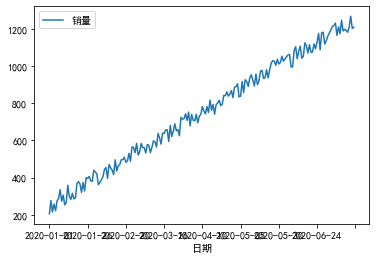

In [5]:
plt.figure() 
df.plot(x='日期') 
plt.savefig('first.jpg') 
#这里可以省略plt.show()

<Figure size 432x288 with 0 Axes>

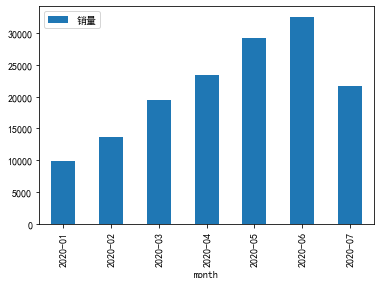

In [6]:
plt.figure() 
df1 = df.loc[:]#这句话写成df1=df.copy()更容易理解
df1['month'] = df1['日期'].map(lambda x: x[:x.rindex('-')]) #截取最后一个“-”之前的字符串，即年月
df1 = df1.groupby(by='month', as_index=False).sum() 
df1.plot(x='month', kind='bar') 
plt.savefig('second.jpg') 

In [7]:
df2 = df1.drop('month', axis=1).diff() 
m = df2['销量'].nlargest(1).keys()[0] 
with open('maxMonth.txt', 'w') as fp: 
    fp.write(df1.loc[m, 'month']) 

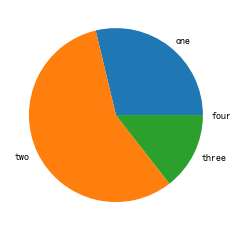

In [8]:
plt.figure() 
one = df1[:3]['销量'].sum() 
two = df1[3:6]['销量'].sum() 
three = df1[6:9]['销量'].sum() 
four = df1[9:12]['销量'].sum() 
plt.pie([one, two, three, four],labels=['one', 'two', 'three', 'four']) 
plt.savefig('third.jpg')